## Predicting players rating

In this project you are going to predict the overall rating of soccer player based on their attributes
such as 'crossing', 'finishing etc.

The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than
10,000 players for European professional soccer seasons from 2008 to 2016.

Download the data in the same folder and run the following commmand to get it in the environment

## Import Libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,accuracy_score
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Data from the Database into pandas

In [2]:
# Create the connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


## Number of Data/observation present in the dataset 

In [4]:
df.shape

(183978, 42)

there are 1,83,978 rows/observations and 42 column 

In [5]:
#name of the columns present 
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [6]:
#Check information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [7]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [8]:
df.describe(include='O')

,date,preferred_foot,attacking_work_rate,defensive_work_rate
count,183978,183142,180748,183142
unique,197,2,8,19
top,2007-02-22 00:00:00,right,medium,medium
freq,11794,138409,125070,130846


date , prefrred_foot , attacking_work_rate and defensive_work_rate are the catergorical object.

date has 197 unique values. 
preferred_foot has 2 unique values
attacking_work_rate has 8 unique values
defensive_work_rate has 19 unique values. 



## Number of unique count in the categorical columns 

In [9]:
df['preferred_foot'].value_counts()

right    138409
left      44733
Name: preferred_foot, dtype: int64

In [10]:
df['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [11]:
df['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

## Analysing the Catergorical feature with the target variable 

In [12]:
df.columns.drop('overall_rating')

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

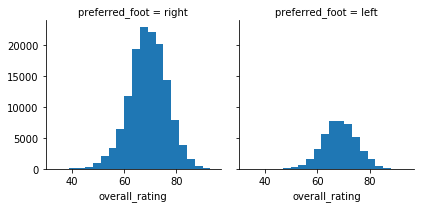

In [13]:
g = sns.FacetGrid(df, col = 'preferred_foot')     
g.map(plt.hist, 'overall_rating', bins = 20)

In [14]:
# from the above graph we can say that if the player's preferred foot is Right , then the overall rating can be higher 
#than the player's whose  preferred foot is left 

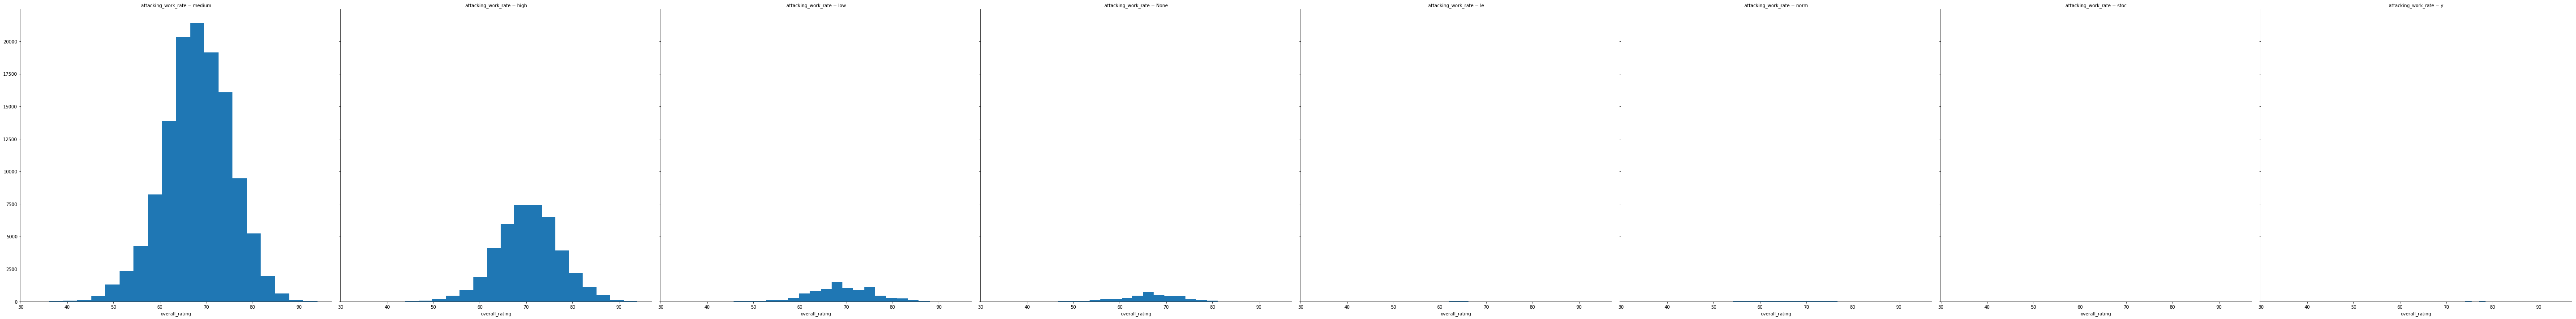

In [15]:

g = sns.FacetGrid(df, col = 'attacking_work_rate',height=10)     
g.map(plt.hist, 'overall_rating', bins = 20 )



In [16]:
# from the above graph we can say that if the player's attacking work rate is Medium it positively 
#impacts the overall rating of the player. 

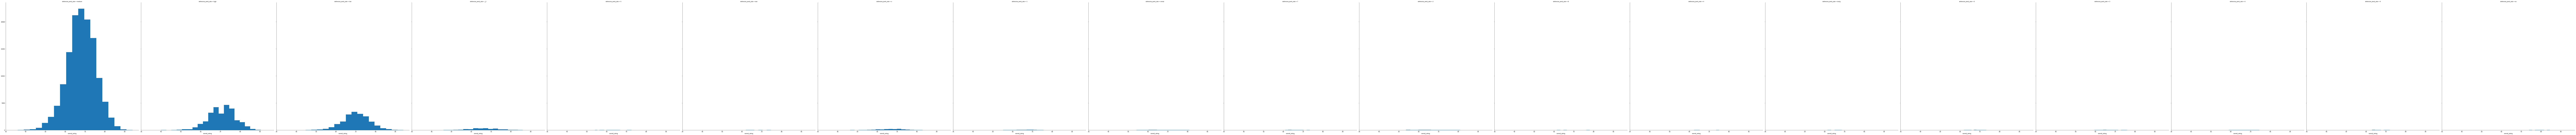

In [17]:
g = sns.FacetGrid(df,col='defensive_work_rate',height=15)
g.map(plt.hist,'overall_rating',bins=20)

In [18]:
# from the above graph we can say that if the player's defensive work rate is Medium it positively impacts 
#the overall rating of the player. 

## Missing Values Imputation 

In [19]:
#total number of rows in dataset
rows = df.shape[0]
rows

183978

In [20]:
#take the copy of the original data

data = df.copy()
data.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [21]:
#drop the null values by going through each row.

# Drop the NULL rows
df = df.dropna()
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [22]:
df.shape

(180354, 42)

In [23]:
#Check if all NULLS are gone ?
#df.isnull().any(), df.shape
df.isnull().any().any(), df.shape

(False, (180354, 42))

In [24]:
#How many rows with NULL values?

rows-df.shape[0]

3624

Our data table has many lines as you have seen. We can only look at few lines at once. Instead of looking at same top 10 lines 
every time, we shuffle - so we get to see different random sample on top. This way, we make sure the data is not in any 
particular order when we try sampling from it (like taking top or bottom few rows) by randomly shuffling the rows.

In [25]:
#Shuffle the rows of df so we get a distributed sample when we display top few rows

df = df.reindex(np.random.permutation(df.index))

In [26]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
157800,157801,212623,428947,2014-12-27 00:00:00,68.0,79.0,right,medium,medium,48.0,...,54.0,63.0,25.0,24.0,20.0,8.0,7.0,13.0,7.0,14.0
116422,116423,184472,25667,2008-08-30 00:00:00,58.0,78.0,left,high,medium,64.0,...,65.0,28.0,68.0,62.0,74.0,4.0,21.0,51.0,21.0,21.0
165171,165172,144075,8784,2014-01-24 00:00:00,57.0,57.0,right,medium,medium,45.0,...,46.0,56.0,52.0,52.0,54.0,9.0,13.0,7.0,10.0,10.0
112960,112961,162048,25922,2015-02-20 00:00:00,70.0,70.0,left,high,medium,60.0,...,49.0,70.0,68.0,75.0,82.0,7.0,6.0,8.0,8.0,8.0
152043,152044,198329,193869,2012-02-22 00:00:00,76.0,83.0,left,medium,medium,67.0,...,61.0,69.0,23.0,32.0,22.0,7.0,13.0,10.0,11.0,5.0


## Feature Correlation Analysis

Next, we will check if ‘penalties’ is correlated to ‘overall_rating’.
Are these correlated (using Pearson’s correlation coefficient) ?

In [27]:
df['overall_rating'].corr(df['penalties'])

0.39271510791118897

We see that Pearson’s Correlation Coefficient for these two columns is 0.39. 

Pearson goes from -1 to +1. A value of 0 would have told there is no correlation, so we shouldn’t bother looking at that 
attribute. A value of 0.39 shows some correlation, although it could be stronger. 

Let's create the correlation with all the independept feature with the depend feature 

In [28]:
#potentialFeatures = df.columns
#potentialFeatures.drop(['overall_rating','date'])
#potentialFeatures.drop('date')
#potentialFeatures

In [29]:
#drop the categorical columns 

potentialFeatures = [ 'potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']
potentialFeatures

['potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [30]:
#check how the features are correlated with the overall ratings

for f in potentialFeatures:
    related = data['overall_rating'].corr(data[f])
    print("%s: %f" % (f,related))


potential: 0.766757
crossing: 0.357699
finishing: 0.329298
heading_accuracy: 0.314099
short_passing: 0.458361
volleys: 0.361470
dribbling: 0.354324
curve: 0.357772
free_kick_accuracy: 0.349592
long_passing: 0.435018
ball_control: 0.444257
acceleration: 0.245655
sprint_speed: 0.254841
agility: 0.239896
reactions: 0.769246
balance: 0.160364
shot_power: 0.427996
jumping: 0.259023
stamina: 0.327456
strength: 0.318661
long_shots: 0.392382
aggression: 0.323934
interceptions: 0.250370
positioning: 0.370019
vision: 0.431137
penalties: 0.393189
marking: 0.133377
standing_tackle: 0.165349
sliding_tackle: 0.128889
gk_diving: 0.027976
gk_handling: 0.004410
gk_kicking: 0.025682
gk_positioning: 0.005709
gk_reflexes: 0.005687


from above result column 'potential' and 'reactions' features are highly co-related to the target variable i.e 'overall_rating'. 

We have not taken into consideration of the categorical features in the dataset. 

column : 
    
    id : gives the unique identification for the player in the dataset
    player_fifa_api_id : fifa team id of the player
        player_api_id : player id 
            date : may be when the match has conducted 
                
                
we can ignore these columns from modeling the training data , since it has no impact on the target variable 
            

In [31]:
#delete the above columns from the dataset 

df.drop(['id','player_fifa_api_id','player_api_id','date'],inplace=True,axis=1)


In [32]:
df.shape

(180354, 38)

## perform one hot encoding categorical feature

In [33]:

dummy_df = pd.get_dummies(df, columns=['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'])
dummy_df.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
157800,68.0,79.0,48.0,76.0,64.0,48.0,71.0,72.0,51.0,54.0,...,0,0,0,0,0,0,1,0,0,0
116422,58.0,78.0,64.0,28.0,40.0,59.0,68.0,38.0,56.0,28.0,...,0,0,0,0,0,0,1,0,0,0
165171,57.0,57.0,45.0,56.0,55.0,63.0,35.0,52.0,44.0,52.0,...,0,0,0,0,0,0,1,0,0,0
112960,70.0,70.0,60.0,48.0,57.0,68.0,44.0,58.0,58.0,60.0,...,0,0,0,0,0,0,1,0,0,0
152043,76.0,83.0,67.0,79.0,75.0,69.0,75.0,78.0,77.0,62.0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
dummy_df.shape

(180354, 63)

In [35]:
dummy_df.columns

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'preferred_foot_left',
       'preferred_foot_right', 'attacking_work_rate_None',
       'attacking_work_rate_high', 'attacking_work_rate_le',
       'attacking_work_rate_low', 'attacking_work_rate_medium',
       'attacking_work_rate_norm', 'attacking_work_rate_stoc',
       'attacking_work_rate_y', 'defensive_work_rate_0',
       'defensive_work_rate_1', 'defensive_work_rate_2',
       'defensive_work_rate_3', 'defensive_work_rate_4',
  

## Model Building using Linear Regression

In [36]:
x_data = dummy_df.drop('overall_rating',axis=1)
x_data.shape 

(180354, 62)

In [37]:
y_data=dummy_df[['overall_rating']]
y_data.shape

(180354, 1)

In [38]:
#split the data into train and test 
X_train, x_test ,y_train ,y_test =  train_test_split(x_data,y_data ,test_size=0.33)

In [39]:
#initiate the Linear Regression and assing it to the object 
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
#fit the model with train data 
model = lr.fit(X_train,y_train)

In [41]:
#predict the model with the test data 
predict = model.predict(x_test)

In [42]:
predict

array([[81.0781692 ],
       [64.19075025],
       [58.40339451],
       ...,
       [68.75937038],
       [70.20860658],
       [73.06799196]])

In [43]:
model.score(x_test,y_test)

0.8447819021351958

In [44]:
mean_squared_error(y_test,predict)

7.685051612321722

In [45]:

r2_score(y_test,predict)

0.8447819021351958

### Linear Regression model can predict the target function with approximate of 84.29 % accuracy.

## Model Building using Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
max_depth_parameter =  [3, 5, 7, 9, 11,13,15,17,19,20,23,25]

In [48]:
for i in max_depth_parameter:
    dt = DecisionTreeRegressor(criterion='mse',max_depth=i,  random_state=0)
    decisionModel = dt.fit(X_train,y_train)
    result = decisionModel.predict(x_test)
    print("Decision Tress accuracy score for the max_depth : " ,str(i) )
    print("Accuracy Score : " ,str(decisionModel.score(x_test,y_test)))


Decision Tress accuracy score for the max_depth :  3
Accuracy Score :  0.6768813093138004
Decision Tress accuracy score for the max_depth :  5
Accuracy Score :  0.7764628116105028
Decision Tress accuracy score for the max_depth :  7
Accuracy Score :  0.8451375779569844
Decision Tress accuracy score for the max_depth :  9
Accuracy Score :  0.8862907061737464
Decision Tress accuracy score for the max_depth :  11
Accuracy Score :  0.9148946618404721
Decision Tress accuracy score for the max_depth :  13
Accuracy Score :  0.9315106506105292
Decision Tress accuracy score for the max_depth :  15
Accuracy Score :  0.9444883332074546
Decision Tress accuracy score for the max_depth :  17
Accuracy Score :  0.9503629515242943
Decision Tress accuracy score for the max_depth :  19
Accuracy Score :  0.953958843478754
Decision Tress accuracy score for the max_depth :  20
Accuracy Score :  0.9558006266000899
Decision Tress accuracy score for the max_depth :  23
Accuracy Score :  0.9566946229713251
Deci

#### Decision Tree Regressor can predict the target function with 93% to 95% accuracy if the max_depth is chossen as 13 or above. 


From above model sample we say that Decision Tree Regressor is more accurate in predicting the overall 
ratings of individual player than Linear Regresion.   